In [20]:
import pandas as pd
import matplotlib as plt

In [2]:
customer_df = pd.read_json('dim_customer.json')
customer_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [3]:
invoice_df = pd.read_csv('fct_invoice.csv')
invoice_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
combined_df = customer_df.merge(invoice_df,left_on='id',right_on='customer_id')
combined_df

,age,first_name,gender,id,last_name,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,48.0,Nicholas,M,0,Flores,I254078,0,Shoes,3,1800.51,Cash,28/05/2021,Kanyon
1,48.0,Nicholas,M,0,Flores,I387354,0,Shoes,1,600.17,Cash,7/4/2021,Kanyon
2,48.0,Nicholas,M,0,Flores,I170558,0,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM
3,48.0,Nicholas,M,0,Flores,I187874,0,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul
4,48.0,Nicholas,M,0,Flores,I171870,0,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,9428,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul
99453,NaN,David,M,9494,Roy,I203211,9494,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity
99454,85.0,Thomas,M,10350,Turner,I325731,10350,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM
99455,NaN,April,F,10587,Sanchez,I478078,10587,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity


## Easy

### 1. How many unique customers are in the dataset?

In [12]:
customer_df['id'].nunique()

5191

### 2. What are the different categories of products available? How many unique categories are there?

In [14]:
categories = invoice_df['category'].unique()
print (categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [15]:
invoice_df['category'].nunique()

8

### 3. Which payment method is the most popular? How many times was it used?

In [16]:
invoice_df['payment_method'].value_counts().nlargest(1)

Cash    44447
Name: payment_method, dtype: int64

## Medium

### 1. What are the three most popular categories, by total sales?

In [23]:
combined_df.groupby(['category'])['price'].sum().nlargest(3)

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64

### 2. What are the total sales attributed to customers over the age of 45?

In [19]:
combined_df.loc[combined_df['age']>44,'price'].sum()

22990781.9

### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

<Axes: xlabel='invoice_date'>

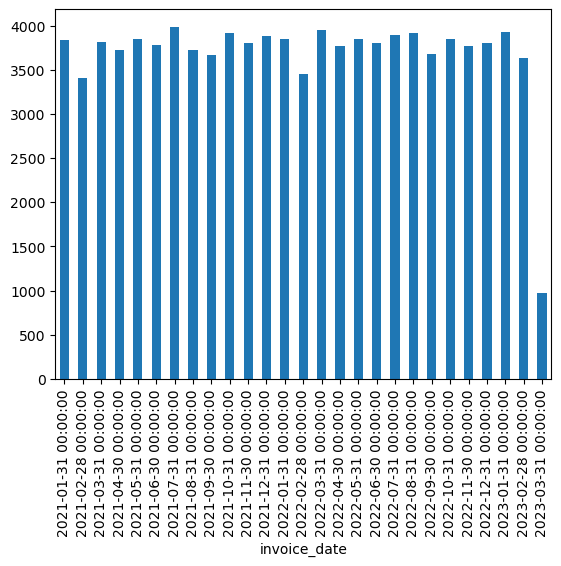

In [32]:
combined_df['invoice_date']=pd.to_datetime(combined_df['invoice_date'],dayfirst=True)

invoice_frequence = combined_df.resample('M',on='invoice_date')['invoice_no'].count()
invoice_frequence.plot.bar()

## Hard

### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [33]:
age = pd.cut(combined_df['age'],[10,19,29,39,49,59,69,79,89,99])

combined_df.pivot_table('price',index='category',columns=age,aggfunc=['sum'])

sum                                                  \
age               (10, 19]    (19, 29]    (29, 39]    (39, 49]    (49, 59]   
category                                                                     
Books              3469.35    21619.05    22997.70    23361.30    20664.60   
Clothing         518238.16  2818351.36  3074919.76  3066817.60  2803647.44   
Cosmetics         29681.80   165079.60   198054.86   181343.60   160932.28   
Food & Beverage    3645.31    20428.38    23744.20    24460.71    19999.52   
Shoes            274277.69  1630061.72  1912141.62  1889335.16  1591650.84   
Souvenir           3296.13    15295.92    17548.08    17759.22    15084.78   
Technology       287700.00  1426950.00  1669500.00  1630650.00  1220100.00   
Toys              17203.20   102466.56   115297.28   106910.72    94115.84   

                                                              
age                (59, 69]    (69, 79]    (79, 89] (89, 99]  
category                                                      
Books              21513.00    15437.85     7575.00      0.0  
Clothing         2910776.00  2117064.40  1228827.60      0.0  
Cosmetics         176627.04   114132.62    71236.32      0.0  
Food & Beverage    22190.89    14968.26     8561.51      0.0  
Shoes            1618058.32  1210542.89   708200.60      0.0  
Souvenir           15331.11    10592.19     6545.34      0.0  
Technology       1529850.00   977550.00   548100.00      0.0  
Toys              100244.48    74475.52    43043.84      0.0